In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# visual features
def extract_color_histogram(image):

    if image is None or image.size == 0:
        raise ValueError('Invalid image. Make sure the image is not None and has valid data.')

    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Shot Change Detection
def detect_shot_change(frame1, frame2, threshold, distance_method):

    distance_methods = {
        'correlation': cv2.HISTCMP_CORREL,
        'intersection': cv2.HISTCMP_INTERSECT,
        'bhatta': cv2.HISTCMP_BHATTACHARYYA,
        'chisqr': cv2.HISTCMP_CHISQR,
        'chisqr_alt': cv2.HISTCMP_CHISQR_ALT,
    }
    if distance_method not in distance_methods:
        raise ValueError('Invalid distance method. Supported methods are "correlation", "intersection", "bhatta", "chisqr", and "chisqr_alt".')

    hist1 = extract_color_histogram(frame1)
    hist2 = extract_color_histogram(frame2)

    hist_diff = cv2.compareHist(hist1, hist2, distance_methods[distance_method])
    
    return hist_diff > threshold


def get_hist_diff_list(folder):

    hist_diff_list = []
    frames = sorted(os.listdir(folder))

    for i in range(1, len(frames)):
        frame1 = cv2.imread(os.path.join(folder, frames[i - 1]))
        frame2 = cv2.imread(os.path.join(folder, frames[i]))
    
        hist1 = extract_color_histogram(frame1)
        hist2 = extract_color_histogram(frame2)

        hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR_ALT)
        hist_diff_list.append(hist_diff)

    return hist_diff_list


def get_hist_diff_list_ngc(folder):

    hist_diff_list = []
    frames = sorted(os.listdir(folder))
    frames = frames[1:] #因為多一個DS_store檔案刪不掉

    for i in range(1, len(frames)):
        frame1 = cv2.imread(os.path.join(folder, frames[i - 1]))
        frame2 = cv2.imread(os.path.join(folder, frames[i]))
    
        hist1 = extract_color_histogram(frame1)
        hist2 = extract_color_histogram(frame2)

        hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR_ALT)
        hist_diff_list.append(hist_diff)

    return hist_diff_list


# Visualization
def plt_hist_diff_news(hist_diff_list, upper_bound, ylim = 5):

    fig = plt.figure(figsize=(20, 10))  
    
    plt.plot(range(len(hist_diff_list)), hist_diff_list, label='Histogram Difference')
    plt.xlabel('Frame')
    plt.ylabel('Histogram Difference')
    plt.title('Histogram Difference between Consecutive Frames')

    # upper_bound = 1.398  
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')

    frame_no_list = []
    for i, diff in enumerate(hist_diff_list):
        if diff > upper_bound:
            frame_no_list.append(i+1)

    for i, number in enumerate(frame_no_list):      
        if i % 2 == 0:  
            plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound - ylim/10),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
        else:  
            plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound + ylim/10),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.ylim(0, ylim) 
    plt.legend() 
    plt.show()


def plt_hist_diff_climate(hist_diff_list, upper_bound, ylim = 5):

    fig = plt.figure(figsize=(20, 10))  
    
    plt.plot(range(len(hist_diff_list)), hist_diff_list, label='Histogram Difference')
    plt.xlabel('Frame')
    plt.ylabel('Histogram Difference')
    plt.title('Histogram Difference between Consecutive Frames')

    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')

    frame_no_list = []
    for i, diff in enumerate(hist_diff_list):
        if diff > upper_bound:
            frame_no_list.append(i+2)  #因為圖片從 0001.jpg 開始

    for i, number in enumerate(frame_no_list):      
        if i % 2 == 0:  
            plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound - ylim/10),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
        else:  
            if number == 886:
                plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound + ylim/5),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
            else:
                plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound + ylim/10),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.ylim(0, ylim) 
    plt.legend() 
    plt.show()


def plt_hist_diff_ngc(hist_diff_list, upper_bound, ylim = 5):

    fig = plt.figure(figsize=(20, 10)) 
    
    plt.plot(range(len(hist_diff_list)), hist_diff_list, label='Histogram Difference')
    plt.xlabel('Frame')
    plt.ylabel('Histogram Difference')
    plt.title('Histogram Difference between Consecutive Frames')

    # upper_bound = 1.398  
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')

    frame_no_list = []
    for i, diff in enumerate(hist_diff_list):
        if diff > upper_bound:
            frame_no_list.append(i+1)

    for i, number in enumerate(frame_no_list):      
        random_number = random.randint(0, upper_bound)
        if i % 2 == 0:  
            plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound - random_number),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
        else:  
            plt.annotate(number, xy=(number, upper_bound), xytext=(number, upper_bound + random_number),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.ylim(0, ylim) 
    plt.legend() 
    plt.show()

# 影片一：news

- Shot Change Detection

In [2]:
folder_path = 'news_out'

hist_diff_list_news = get_hist_diff_list(folder_path)

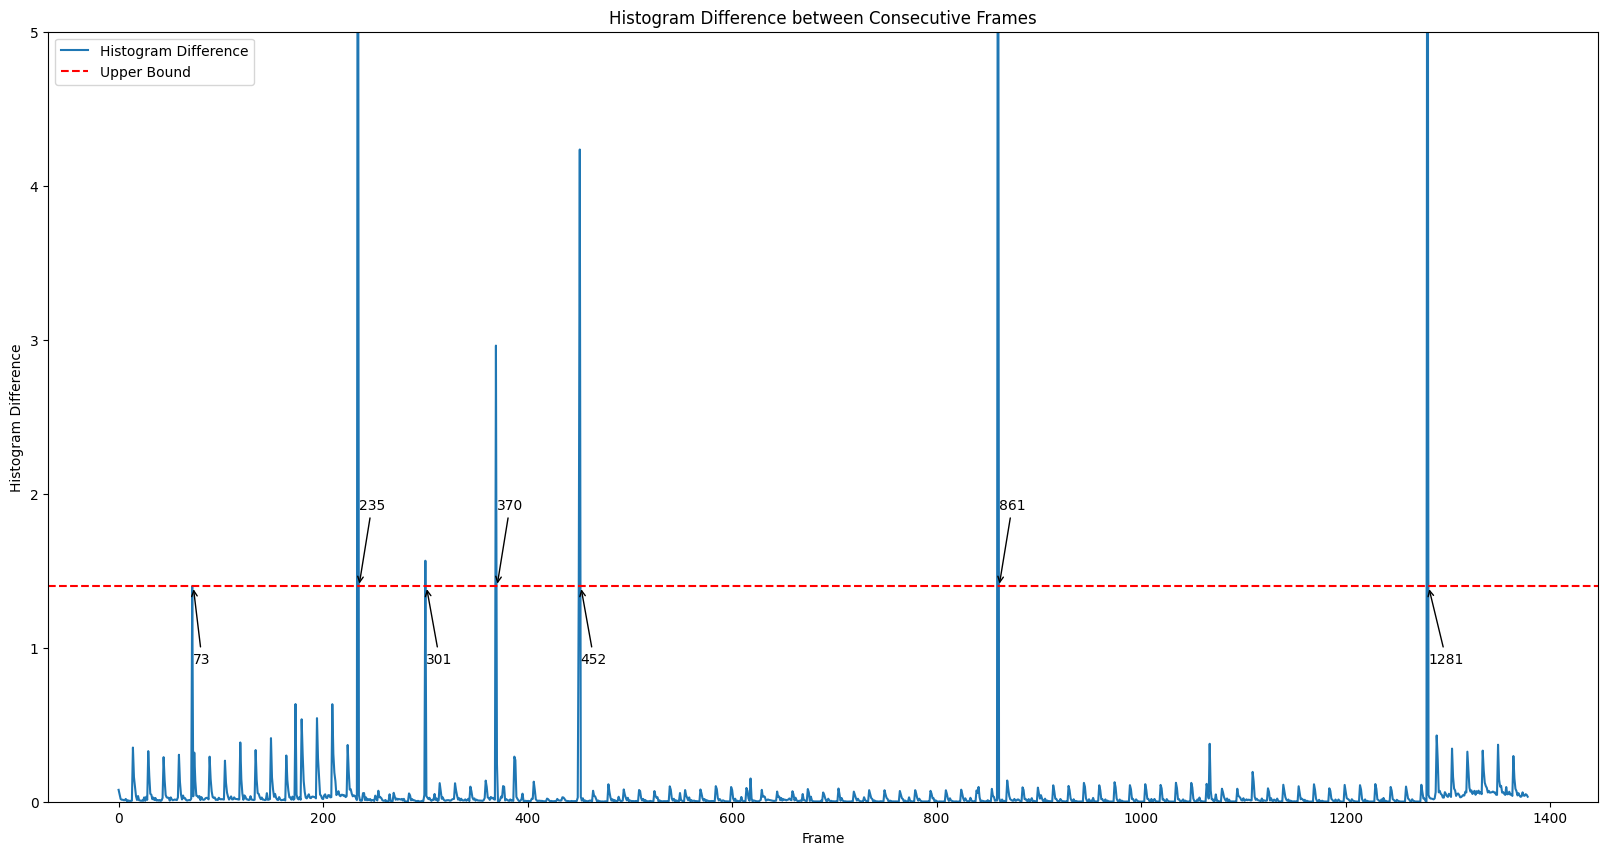

In [3]:
threshold_value = 1.398

plt_hist_diff_news(hist_diff_list_news, upper_bound = threshold_value)

In [4]:
threshold_value = 1.398
folder_path = 'news_out'


frames = sorted(os.listdir(folder_path))
print(frames)

is_shot_change_prev = False
for i in range(1, len(frames)-1):
    frame1 = cv2.imread(os.path.join(folder_path, frames[i - 1]))
    frame2 = cv2.imread(os.path.join(folder_path, frames[i]))
    frame3 = cv2.imread(os.path.join(folder_path, frames[i + 1]))
    
    is_shot_change_curr = detect_shot_change(frame1, frame2, threshold_value, distance_method = 'chisqr_alt')
    is_shot_change_next = detect_shot_change(frame2, frame3, threshold_value, distance_method = 'chisqr_alt')

    if (is_shot_change_prev == False) & (is_shot_change_curr == True) & (is_shot_change_next == False):
        print(f'Shot Change Detected between {frames[i - 1]} and {frames[i]}')

    is_shot_change_prev = is_shot_change_curr

['news-0000000.jpg', 'news-0000001.jpg', 'news-0000002.jpg', 'news-0000003.jpg', 'news-0000004.jpg', 'news-0000005.jpg', 'news-0000006.jpg', 'news-0000007.jpg', 'news-0000008.jpg', 'news-0000009.jpg', 'news-0000010.jpg', 'news-0000011.jpg', 'news-0000012.jpg', 'news-0000013.jpg', 'news-0000014.jpg', 'news-0000015.jpg', 'news-0000016.jpg', 'news-0000017.jpg', 'news-0000018.jpg', 'news-0000019.jpg', 'news-0000020.jpg', 'news-0000021.jpg', 'news-0000022.jpg', 'news-0000023.jpg', 'news-0000024.jpg', 'news-0000025.jpg', 'news-0000026.jpg', 'news-0000027.jpg', 'news-0000028.jpg', 'news-0000029.jpg', 'news-0000030.jpg', 'news-0000031.jpg', 'news-0000032.jpg', 'news-0000033.jpg', 'news-0000034.jpg', 'news-0000035.jpg', 'news-0000036.jpg', 'news-0000037.jpg', 'news-0000038.jpg', 'news-0000039.jpg', 'news-0000040.jpg', 'news-0000041.jpg', 'news-0000042.jpg', 'news-0000043.jpg', 'news-0000044.jpg', 'news-0000045.jpg', 'news-0000046.jpg', 'news-0000047.jpg', 'news-0000048.jpg', 'news-0000049.jpg',

In [18]:
actual = [1,1,1,1,1, 1,1]
predicted = [1,1,1,1,1, 1,1]

TP = sum(1 for a, p in zip(actual, predicted) if a == 1 and p == 1)
FP = sum(1 for a, p in zip(actual, predicted) if a == 0 and p == 1)
FN = sum(1 for a, p in zip(actual, predicted) if a == 1 and p == 0)

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


# 影片二：climate

- Shot Change Detection

In [5]:
folder_path = 'climate_out'

hist_diff_list_climate = get_hist_diff_list(folder_path)

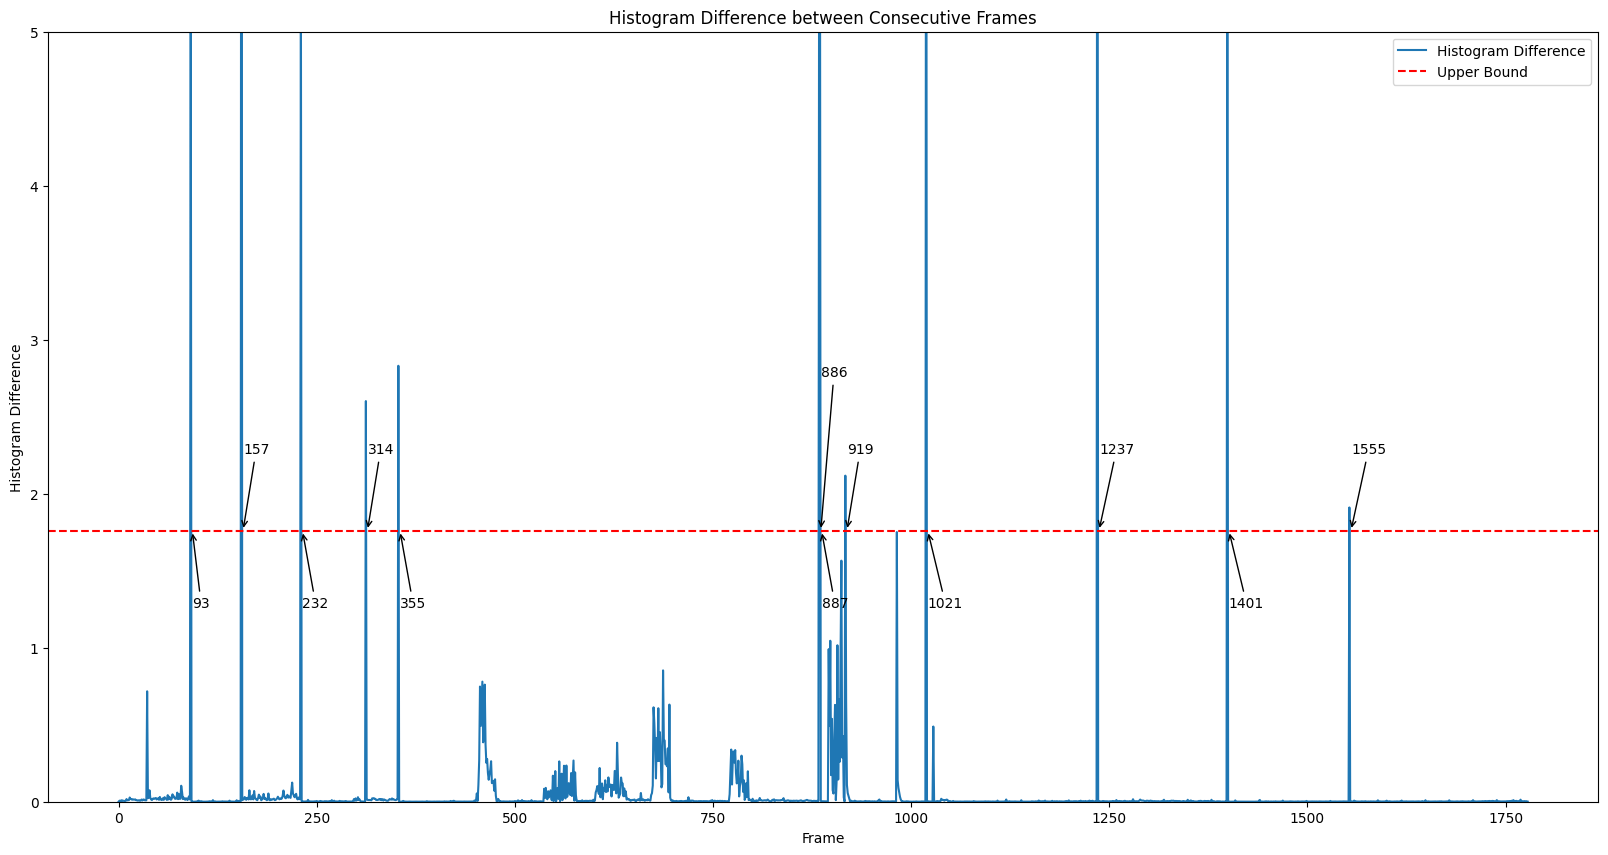

In [6]:
threshold_value = 1.76

plt_hist_diff_climate(hist_diff_list_climate, upper_bound = threshold_value)

In [7]:
threshold_value = 1.76
folder_path = 'climate_out'


frames = sorted(os.listdir(folder_path))
print(frames)

is_shot_change_prev = False
for i in range(1, len(frames)-1):
    frame1 = cv2.imread(os.path.join(folder_path, frames[i - 1]))
    frame2 = cv2.imread(os.path.join(folder_path, frames[i]))
    frame3 = cv2.imread(os.path.join(folder_path, frames[i + 1]))
    
    is_shot_change_curr = detect_shot_change(frame1, frame2, threshold_value, distance_method = 'chisqr_alt')
    is_shot_change_next = detect_shot_change(frame2, frame3, threshold_value, distance_method = 'chisqr_alt')

    if (is_shot_change_prev == False) & (is_shot_change_curr == True) & (is_shot_change_next == False):
        print(f'Shot Change Detected between {frames[i - 1]} and {frames[i]}')

    is_shot_change_prev = is_shot_change_curr

['climate_0001.jpg', 'climate_0002.jpg', 'climate_0003.jpg', 'climate_0004.jpg', 'climate_0005.jpg', 'climate_0006.jpg', 'climate_0007.jpg', 'climate_0008.jpg', 'climate_0009.jpg', 'climate_0010.jpg', 'climate_0011.jpg', 'climate_0012.jpg', 'climate_0013.jpg', 'climate_0014.jpg', 'climate_0015.jpg', 'climate_0016.jpg', 'climate_0017.jpg', 'climate_0018.jpg', 'climate_0019.jpg', 'climate_0020.jpg', 'climate_0021.jpg', 'climate_0022.jpg', 'climate_0023.jpg', 'climate_0024.jpg', 'climate_0025.jpg', 'climate_0026.jpg', 'climate_0027.jpg', 'climate_0028.jpg', 'climate_0029.jpg', 'climate_0030.jpg', 'climate_0031.jpg', 'climate_0032.jpg', 'climate_0033.jpg', 'climate_0034.jpg', 'climate_0035.jpg', 'climate_0036.jpg', 'climate_0037.jpg', 'climate_0038.jpg', 'climate_0039.jpg', 'climate_0040.jpg', 'climate_0041.jpg', 'climate_0042.jpg', 'climate_0043.jpg', 'climate_0044.jpg', 'climate_0045.jpg', 'climate_0046.jpg', 'climate_0047.jpg', 'climate_0048.jpg', 'climate_0049.jpg', 'climate_0050.jpg',

- Fade In/Out Detection

In [8]:
def detect_fade_in_out(folder_path, split_frame, 
                       lower_threshold1, upper_threshold1, threshold1,
                       lower_threshold2, upper_threshold2, threshold2):
    
    frames = sorted(os.listdir(folder_path))
    frames1 = frames[:split_frame]
    frames2 = frames[split_frame:]


    cumulated = 0
    frames_count = 0

    # ============================= frames1 =============================
    for i in range(1, len(frames1)):
        frame1 = cv2.imread(os.path.join(folder_path, frames1[i - 1]))
        frame2 = cv2.imread(os.path.join(folder_path, frames1[i]))
    
        hist1 = extract_color_histogram(frame1)
        hist2 = extract_color_histogram(frame2)

        hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

        overflow = hist_diff - lower_threshold1
        if overflow >= 0:
            if cumulated == 0:
                frame_in = frames1[i]
            cumulated += overflow
            frames_count += 1
        
        if overflow < 0:
            if (frames_count >= 2) and (cumulated > upper_threshold1) and (overflow < threshold1):
                print('cumulated:', cumulated, 'frames_count:', frames_count)
                print(f'Fade In/Out Detected between {frame_in} and {frames1[i-1]}')
            cumulated = 0
            frames_count = 0

    # ============================= frames2 =============================+
    cumulated = 0
    frames_count = 0

    for i in range(1, len(frames2)):
        frame1 = cv2.imread(os.path.join(folder_path, frames2[i - 1]))
        frame2 = cv2.imread(os.path.join(folder_path, frames2[i]))
    
        hist1 = extract_color_histogram(frame1)
        hist2 = extract_color_histogram(frame2)

        hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

        overflow = hist_diff - lower_threshold2
        if overflow >= 0:
            if cumulated == 0:
                frame_in = frames2[i]
            cumulated += overflow
            frames_count += 1
        
        if overflow < 0:
            if (frames_count >= 2) and (cumulated > upper_threshold2) and (overflow < threshold2):
                # print('cumulated:', cumulated, 'frames_count:', frames_count)
                print(f'Fade In/Out Detected between {frame_in} and {frames2[i-1]}')
            cumulated = 0
            frames_count = 0


# 資料夾路徑
folder_path = 'climate_out'
split_frame = 890

lower_threshold1 = 0.03
upper_threshold1= 2.5
threshold1 = 1.76

lower_threshold2 = 5
upper_threshold2 = 9
threshold2 = 0.76
detect_fade_in_out(folder_path, split_frame, lower_threshold1, upper_threshold1, threshold1, lower_threshold2, upper_threshold2, threshold2)

cumulated: 9.159273021475759 frames_count: 23
Fade In/Out Detected between climate_0456.jpg and climate_0478.jpg
cumulated: 2.715040391163214 frames_count: 19
Fade In/Out Detected between climate_0614.jpg and climate_0632.jpg
cumulated: 8.998735531696894 frames_count: 25
Fade In/Out Detected between climate_0674.jpg and climate_0698.jpg
cumulated: 6.934601916254695 frames_count: 19
Fade In/Out Detected between climate_0773.jpg and climate_0791.jpg
cumulated: 170.14302640002316 frames_count: 2
Fade In/Out Detected between climate_0886.jpg and climate_0887.jpg


In [14]:
actual = [1,1,1,1,1, 1,1,1,1,1, 1,0,1,1,1, 1]
predicted = [1,1,1,1,1, 1,0,1,1,1, 1,1,1,1,1, 1]

TP = sum(1 for a, p in zip(actual, predicted) if a == 1 and p == 1)
FP = sum(1 for a, p in zip(actual, predicted) if a == 0 and p == 1)
FN = sum(1 for a, p in zip(actual, predicted) if a == 1 and p == 0)

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9333333333333333
Recall: 0.9333333333333333


# 影片三：ngc

- Shot Change Detection

In [9]:
folder_path = 'ngc_out'

hist_diff_list_ngc = get_hist_diff_list_ngc(folder_path)

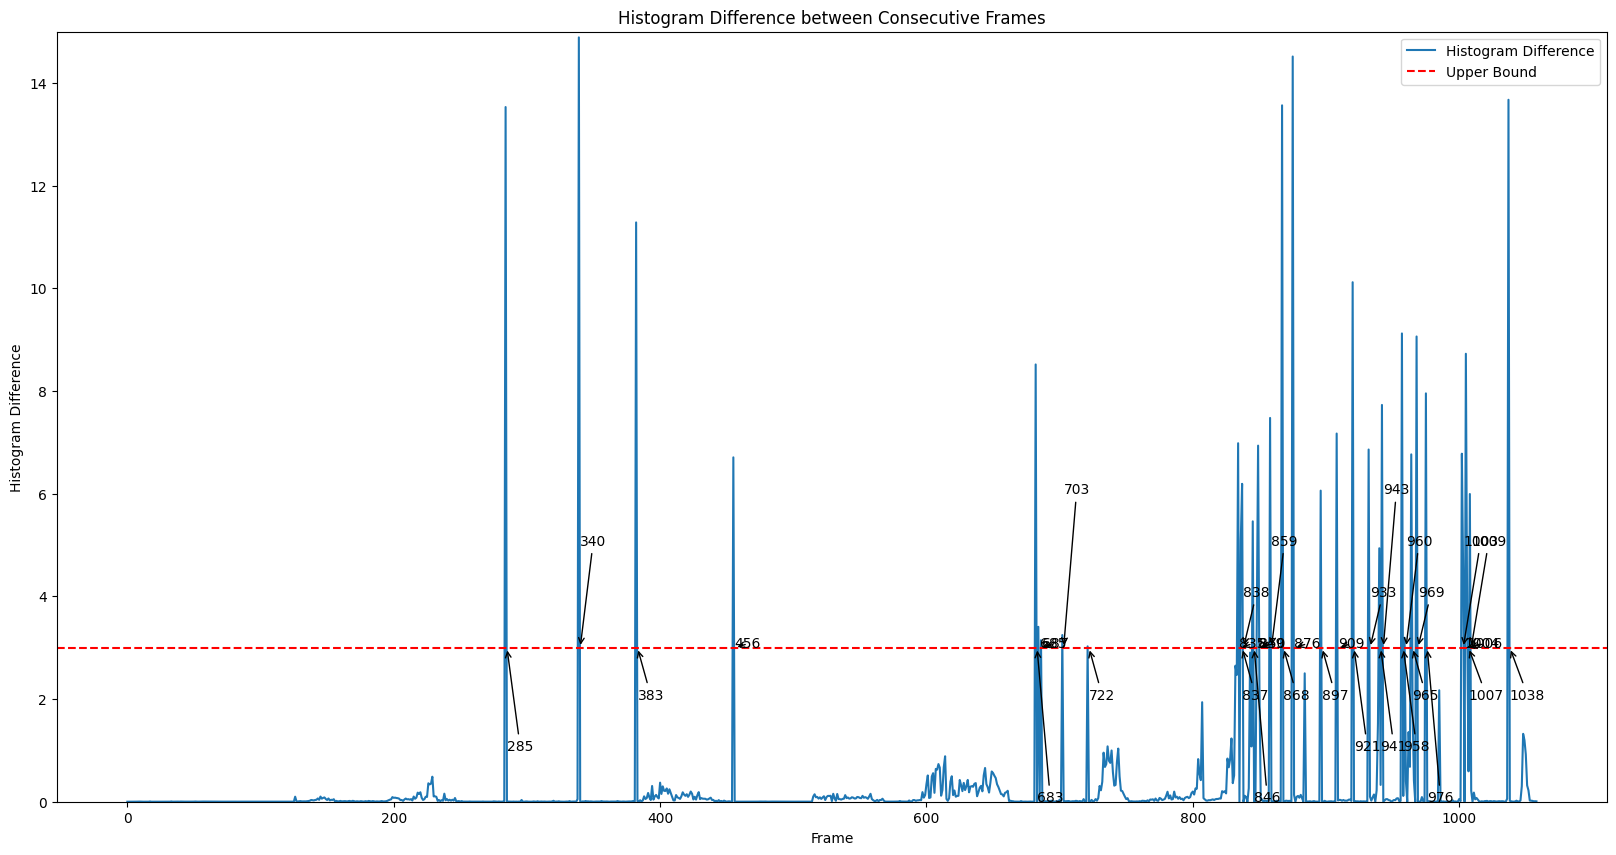

In [10]:
threshold_value = 3
ylim = 15

plt_hist_diff_ngc(hist_diff_list_ngc, upper_bound = threshold_value, ylim = ylim)

In [11]:
threshold_value = 3.4
folder_path = 'ngc_out'


frames = sorted(os.listdir(folder_path))
frames = frames[1:]
print(frames)

is_shot_change_prev = False
for i in range(1, len(frames)-1):
    frame1 = cv2.imread(os.path.join(folder_path, frames[i - 1]))
    frame2 = cv2.imread(os.path.join(folder_path, frames[i]))
    frame3 = cv2.imread(os.path.join(folder_path, frames[i + 1]))
    
    is_shot_change_curr = detect_shot_change(frame1, frame2, threshold_value, distance_method = 'chisqr_alt')
    is_shot_change_next = detect_shot_change(frame2, frame3, threshold_value, distance_method = 'chisqr_alt')

    if (is_shot_change_prev == False) & (is_shot_change_curr == True) & (is_shot_change_next == False):
        print(f'Shot Change Detected between {frames[i - 1]} and {frames[i]}')
        # print(hist_diff_list_ngc[i-1])

    is_shot_change_prev = is_shot_change_curr

['ngc-0000.jpeg', 'ngc-0001.jpeg', 'ngc-0002.jpeg', 'ngc-0003.jpeg', 'ngc-0004.jpeg', 'ngc-0005.jpeg', 'ngc-0006.jpeg', 'ngc-0007.jpeg', 'ngc-0008.jpeg', 'ngc-0009.jpeg', 'ngc-0010.jpeg', 'ngc-0011.jpeg', 'ngc-0012.jpeg', 'ngc-0013.jpeg', 'ngc-0014.jpeg', 'ngc-0015.jpeg', 'ngc-0016.jpeg', 'ngc-0017.jpeg', 'ngc-0018.jpeg', 'ngc-0019.jpeg', 'ngc-0020.jpeg', 'ngc-0021.jpeg', 'ngc-0022.jpeg', 'ngc-0023.jpeg', 'ngc-0024.jpeg', 'ngc-0025.jpeg', 'ngc-0026.jpeg', 'ngc-0027.jpeg', 'ngc-0028.jpeg', 'ngc-0029.jpeg', 'ngc-0030.jpeg', 'ngc-0031.jpeg', 'ngc-0032.jpeg', 'ngc-0033.jpeg', 'ngc-0034.jpeg', 'ngc-0035.jpeg', 'ngc-0036.jpeg', 'ngc-0037.jpeg', 'ngc-0038.jpeg', 'ngc-0039.jpeg', 'ngc-0040.jpeg', 'ngc-0041.jpeg', 'ngc-0042.jpeg', 'ngc-0043.jpeg', 'ngc-0044.jpeg', 'ngc-0045.jpeg', 'ngc-0046.jpeg', 'ngc-0047.jpeg', 'ngc-0048.jpeg', 'ngc-0049.jpeg', 'ngc-0050.jpeg', 'ngc-0051.jpeg', 'ngc-0052.jpeg', 'ngc-0053.jpeg', 'ngc-0054.jpeg', 'ngc-0055.jpeg', 'ngc-0056.jpeg', 'ngc-0057.jpeg', 'ngc-0058.jpe

- Fade In/Out Detection

In [12]:
def detect_fade_in_out(folder_path, split_frame1,
                       lower_threshold1, upper_threshold1, threshold1,
                       lower_threshold2, upper_threshold2, threshold2):
    
    frames = sorted(os.listdir(folder_path))
    if folder_path == "ngc_out":
        frames = frames[1:]
        
    frames1 = frames[:split_frame1]
    frames2 = frames[split_frame1:]
  

    # ============================= frames1 =============================
    cumulated = 0
    frames_count = 0

    for i in range(1, len(frames1)):
        frame1 = cv2.imread(os.path.join(folder_path, frames1[i - 1]))
        frame2 = cv2.imread(os.path.join(folder_path, frames1[i]))
    
        hist1 = extract_color_histogram(frame1)
        hist2 = extract_color_histogram(frame2)

        hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR_ALT)

        overflow = hist_diff - lower_threshold1
        if (overflow >= 0) and (overflow < threshold1):
            if cumulated == 0:
                frame_in = frames1[i]
            cumulated += overflow
            frames_count += 1

        if (overflow < 0) or (overflow > threshold1) or (i == len(frames1)-1):
            if (frames_count >= 2) and (cumulated > upper_threshold1):
                #print('cumulated:', cumulated, 'frames_count:', frames_count)
                print(f'Fade In/Out Detected between {frame_in} and {frames1[i-1]}')
            cumulated = 0
            frames_count = 0

    # ============================= frames2 =============================
    cumulated = 0
    frames_count = 0

    for i in range(1, len(frames2)):
        frame1 = cv2.imread(os.path.join(folder_path, frames2[i - 1]))
        frame2 = cv2.imread(os.path.join(folder_path, frames2[i]))
    
        hist1 = extract_color_histogram(frame1)
        hist2 = extract_color_histogram(frame2)

        hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR_ALT)

        overflow = hist_diff - lower_threshold2
        # print(frames2[i],':',overflow)
        if (overflow >= 0) and (overflow < threshold2):
            if cumulated == 0:
                frame_in = frames2[i]
            cumulated += overflow
            frames_count += 1
        
        if (overflow < 0) or (overflow > threshold2) or (i == len(frames2)-1):
            if (frames_count >= 2) and (cumulated > upper_threshold2):
                # print('cumulated:', cumulated, 'frames_count:', frames_count)
                print(f'Fade In/Out Detected between {frame_in} and {frames2[i-1]}')
            cumulated = 0
            frames_count = 0


# 資料夾路徑
folder_path = 'ngc_out'
split_frame1 = 1000

lower_threshold1 = 0.001
upper_threshold1= 5
threshold1 = 3

lower_threshold2 = 0.01
upper_threshold2 = 1
threshold2 = 6


detect_fade_in_out(folder_path, split_frame1, 
                   lower_threshold1, upper_threshold1, threshold1, 
                   lower_threshold2, upper_threshold2, threshold2)

Fade In/Out Detected between ngc-0124.jpeg and ngc-0274.jpeg
Fade In/Out Detected between ngc-0384.jpeg and ngc-0450.jpeg
Fade In/Out Detected between ngc-0515.jpeg and ngc-0670.jpeg
Fade In/Out Detected between ngc-0723.jpeg and ngc-0834.jpeg
Fade In/Out Detected between ngc-1007.jpeg and ngc-1010.jpeg
Fade In/Out Detected between ngc-1047.jpeg and ngc-1056.jpeg


In [13]:
actual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
predicted = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]

TP = sum(1 for a, p in zip(actual, predicted) if a == 1 and p == 1)
FP = sum(1 for a, p in zip(actual, predicted) if a == 0 and p == 1)
FN = sum(1 for a, p in zip(actual, predicted) if a == 1 and p == 0)

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8571428571428571
Recall: 0.8333333333333334
